<a href="https://colab.research.google.com/github/Mercymerine/logistic_regression/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **About Datasets**

PassengerId: A unique ID number assigned to each passenger for identification purposes.

Survived: Indicates whether the passenger survived (1) or did not survive (0).

Pclass: The passenger's ticket class, which is also a reflection of their socioeconomic status:

1 = First Class (wealthier)
2 = Second Class
3 = Third Class (less wealthy)
Name: The full name of the passenger.

Sex: The gender of the passenger (male or female).

Age: The age of the passenger. Some values might be missing, as the age was not recorded for everyone.

SibSp: The number of siblings and/or spouses the passenger had on board with them. For example:

    0 means no siblings or spouse aboard.
    1 means they had either a sibling or a spouse on board.
    Parch: The number of parents and/or children the passenger had on board with them:

Parch: The number of parents and/or children the passenger had on board with them:

    0 means no parents or children aboard.
    1 or more indicates they traveled with family.
   
Ticket: The ticket number assigned to the passenger.

Fare: The amount of money the passenger paid for their ticket.

Cabin: The cabin number assigned to the passenger. This value may be missing for many passengers.

Embarked: The port where the passenger boarded the Titanic:

C = Cherbourg
Q = Queenstown
S = Southampton

## Importing Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting dataset

In [1]:
#Getting the dataset
!kaggle datasets download -d yasserh/titanic-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 27.1MB/s]


In [2]:
import zipfile
zipfile_path = '/content/titanic-dataset.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [4]:
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
''''''
# Define a dictionary to map ranges to categories
titanic_mapping = {
    0: 'No',
    1: 'Yes'
}

# Apply mapping to the column
titanic['Survived'] = titanic['Survived'].replace(titanic_mapping)
''''''

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **Data Cleaning**

### Applying missingno on the titanic dataset

In [ ]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Checking for the percentage of missing values
#Getting percentage of missing values
percentage = (titanic.isnull().sum() / len(titanic)) * 100
percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
import missingno as msno

<Axes: >

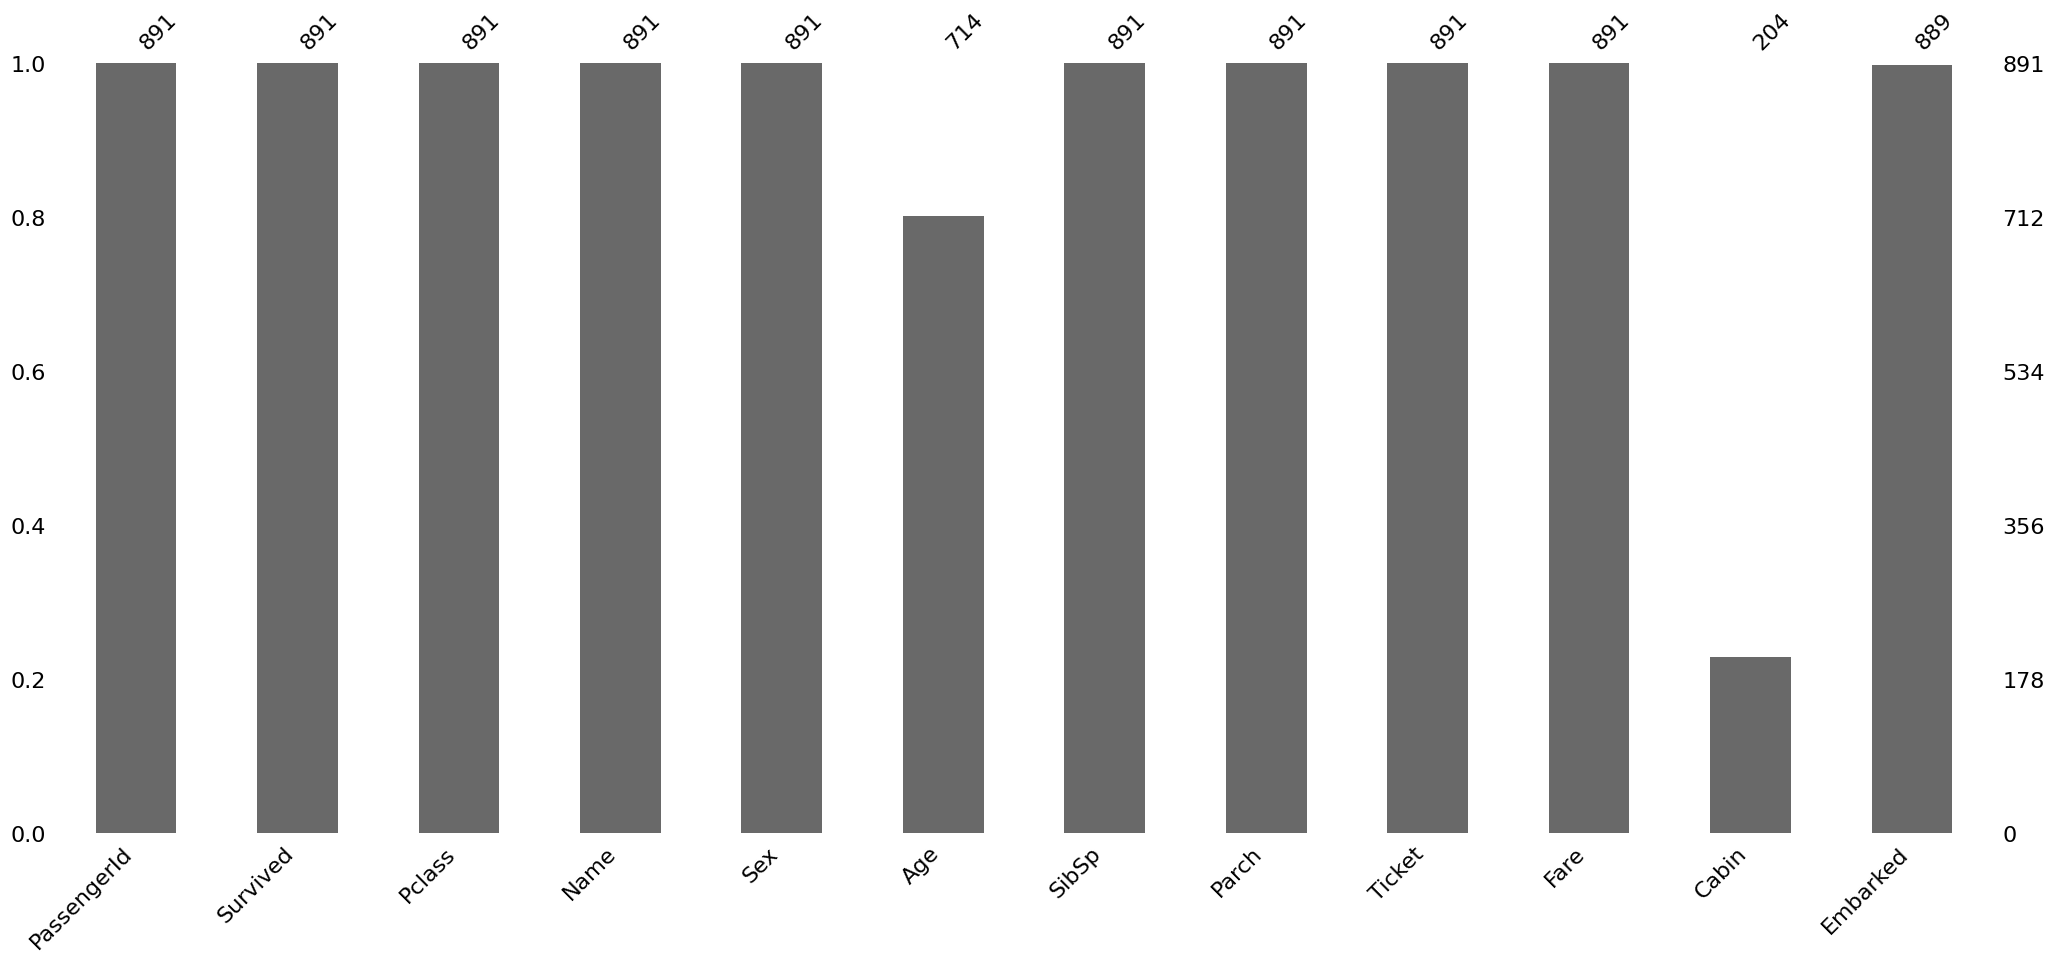

In [ ]:
msno.bar(titanic)

<Axes: >

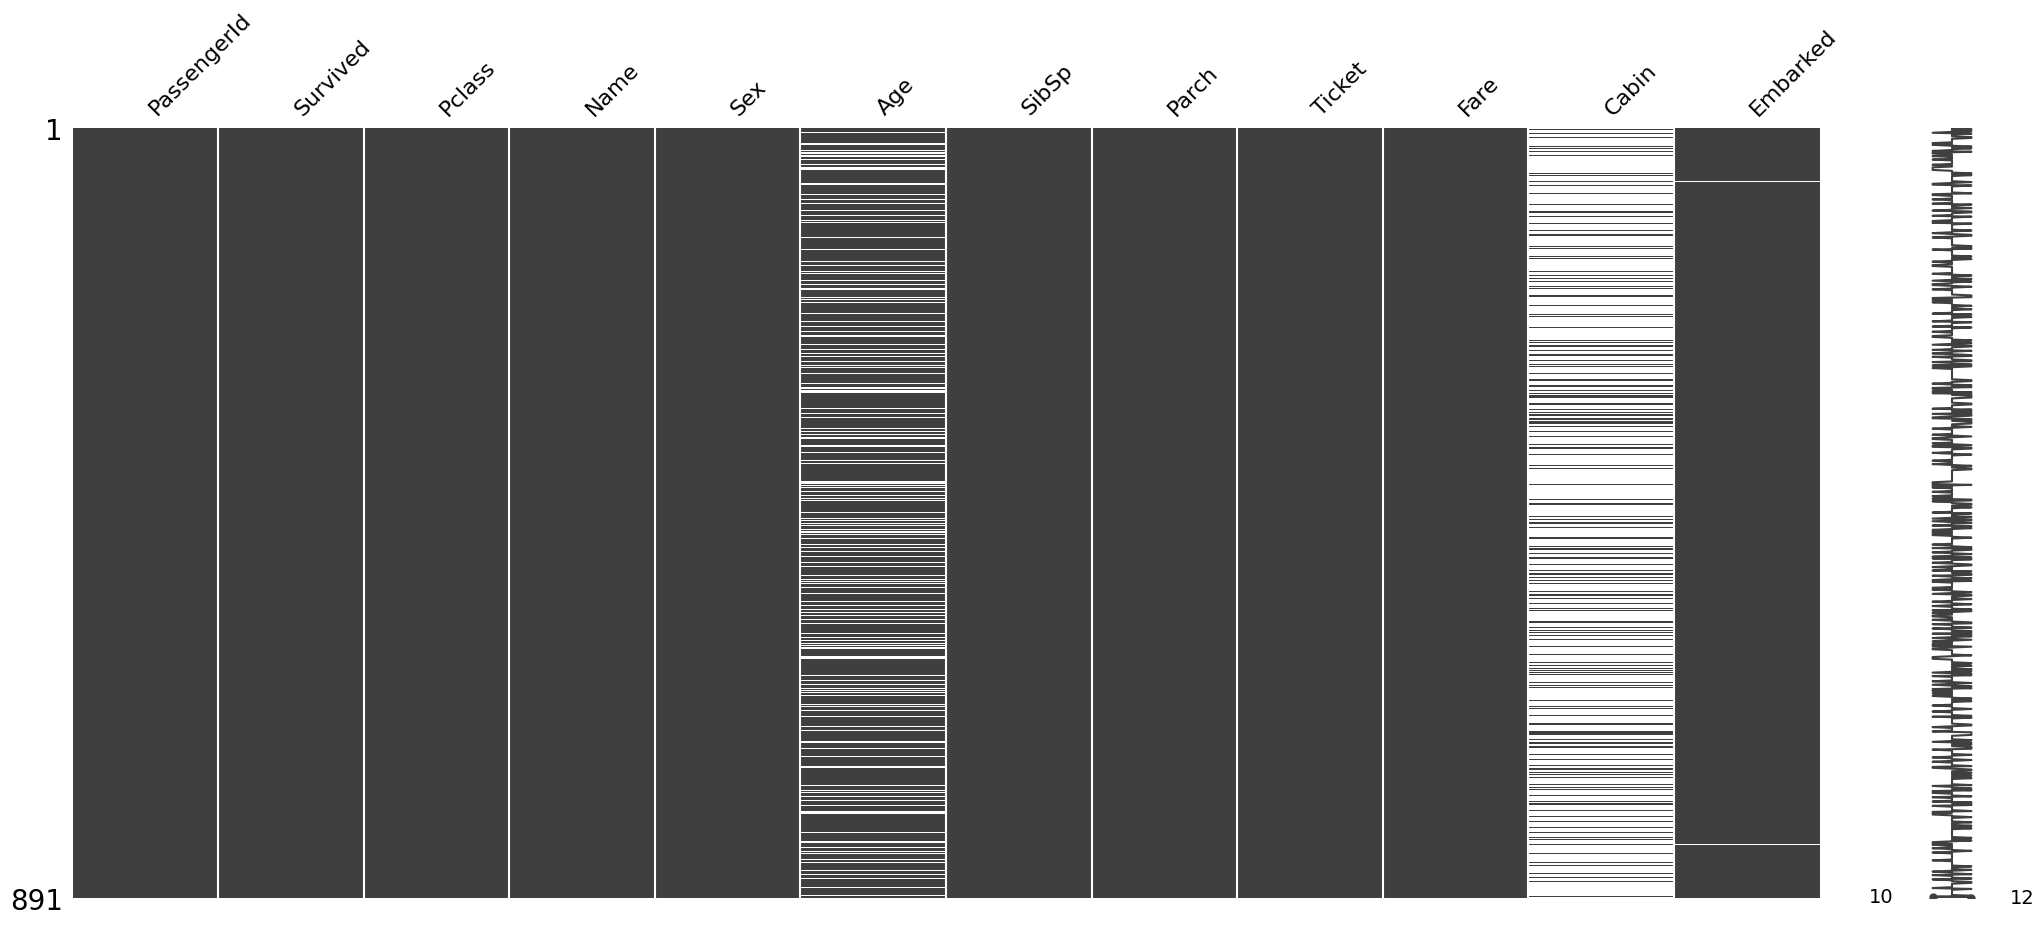

In [ ]:
msno.matrix(titanic)

<Axes: >

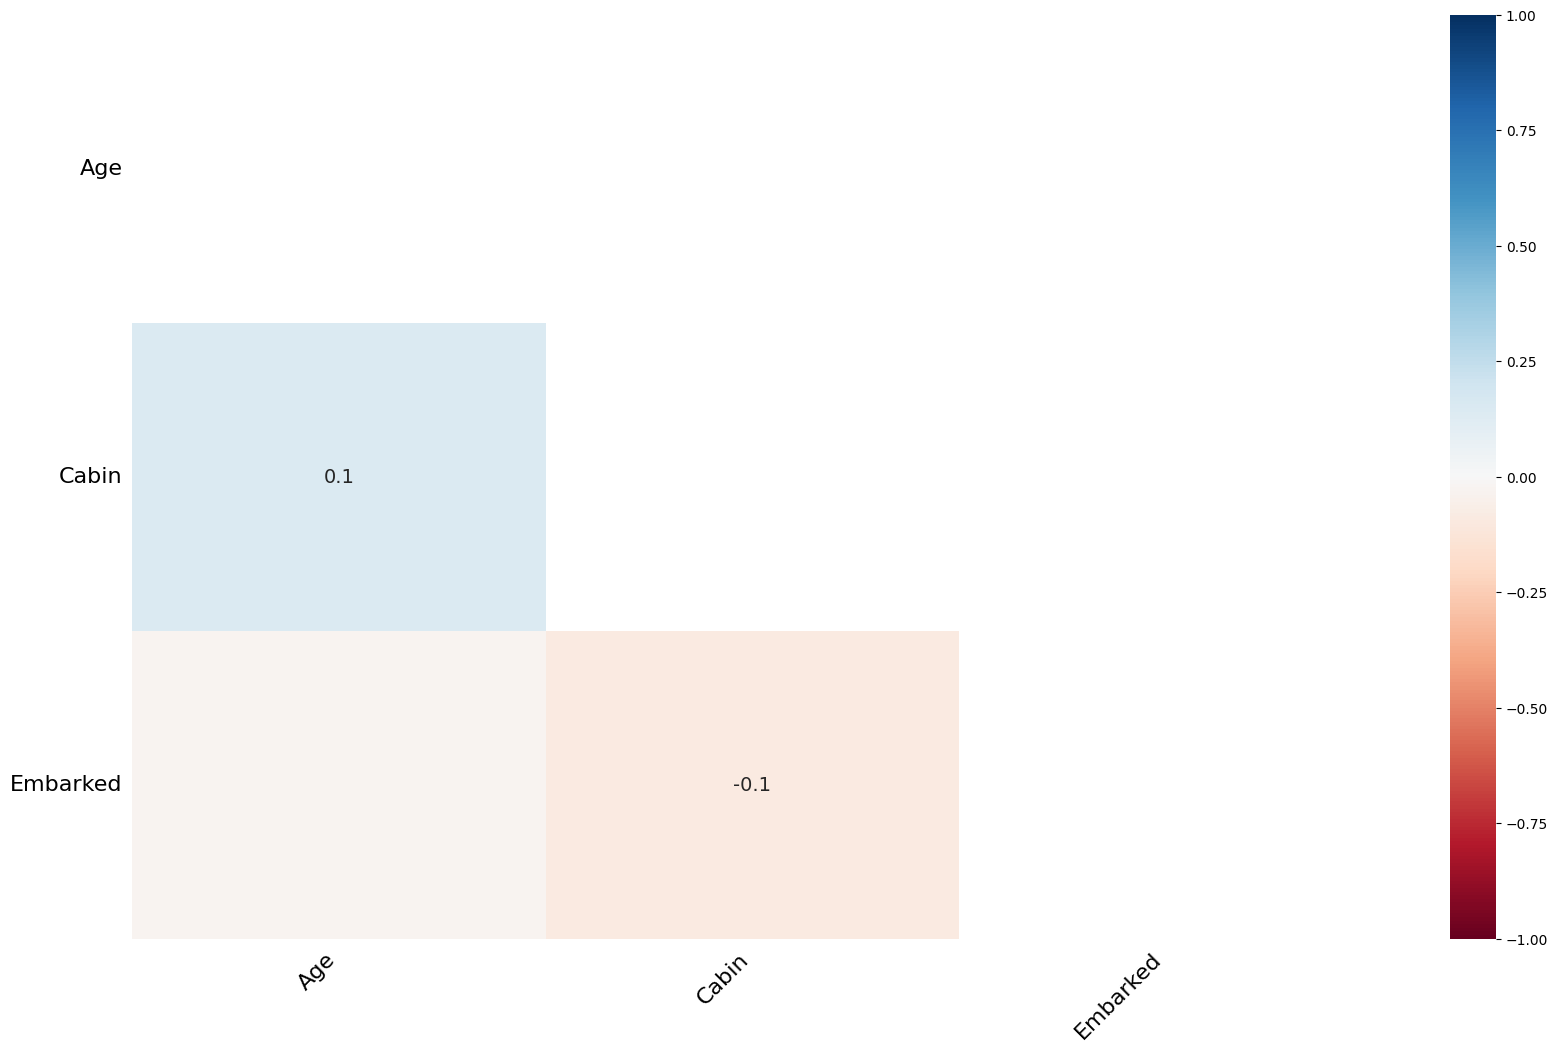

In [ ]:
msno.heatmap(titanic)

In [ ]:
titanic['Ticket'].nunique()

681

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Dropping unnecessary columns
columns = ['PassengerId', 'Name', 'Cabin', 'Ticket' ]
titanic.drop(columns, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

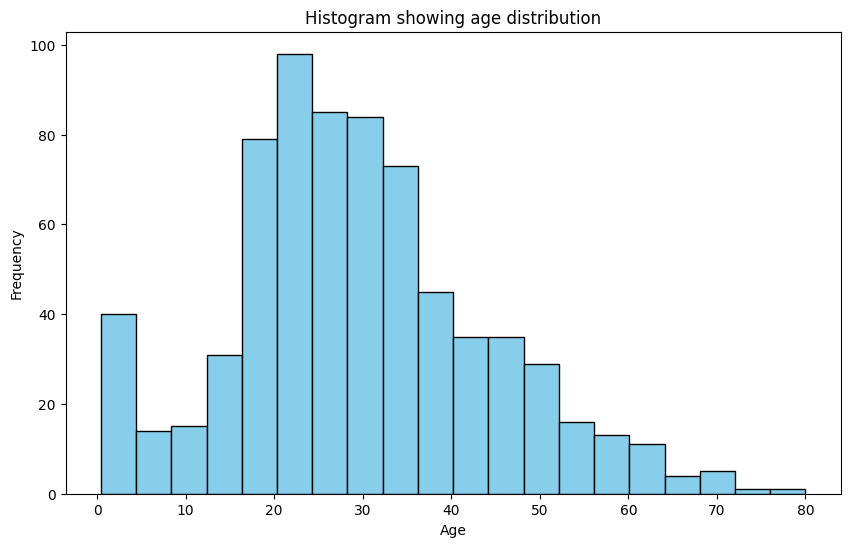

In [ ]:

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram showing age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Replacing missing values in age column with mean
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())

In [ ]:
#Replacing missing values in age column with mode
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## **Data Analysis**

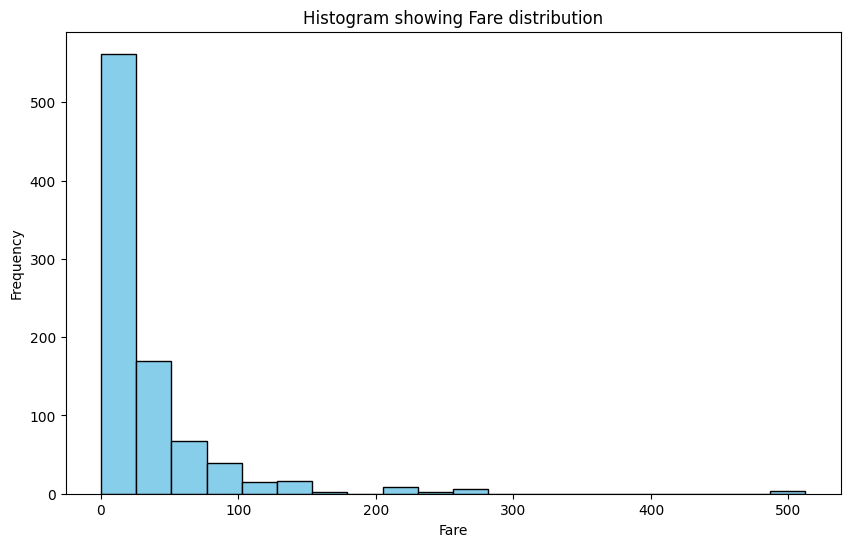

In [ ]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(titanic['Fare'], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram showing Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

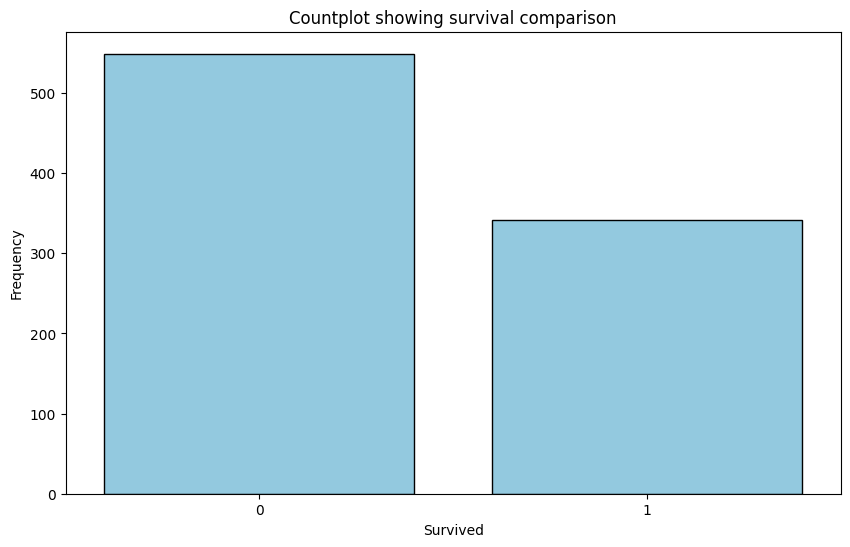

In [ ]:
# Plotting the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Survived', color='skyblue', edgecolor='black')
plt.title(f'Countplot showing survival comparison')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

Most people

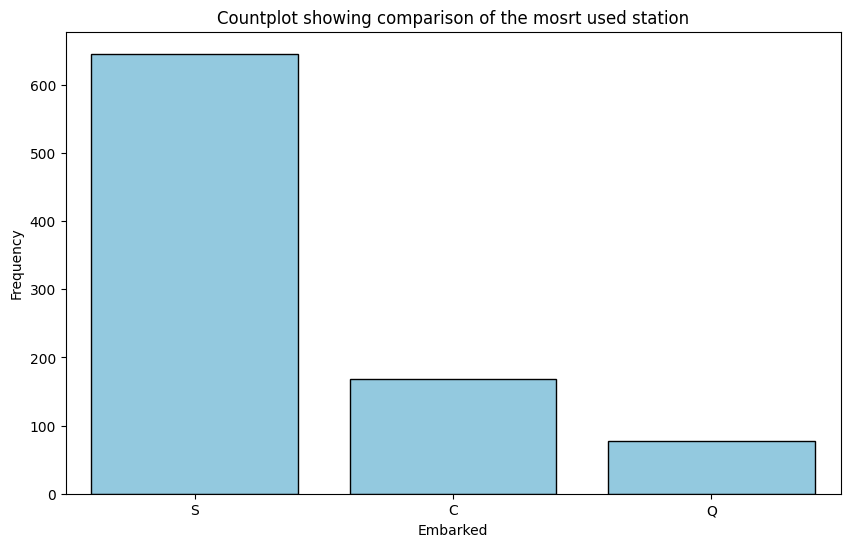

In [ ]:
#Plotting a bar graph to show which station was used the most
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Embarked', color='skyblue', edgecolor='black')
plt.title(f'Countplot showing comparison of the mosrt used station')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.show()

 Titanic at Southampton, England, because it was the primary port of embarkation for the ship’s maiden voyage from Europe to North America.
 Deep-water dock, known as the “White Star Dock”, which had been specially constructed to accommodate the new Olympic-class liners, including the Titanic. This dock provided easy access for passengers and cargo.
Proximity to London and other major cities, making it a convenient location for passengers to travel to from various parts of the UK.
Established passenger and cargo handling facilities, ensuring efficient embarkation and disembarkation processes.

However, The Port of Cherbourg was a major embarkation point for passengers traveling from Europe to North America, but the Titanic’s maiden voyage did not include a scheduled stop there. As a result, Cherbourg was not a primary embarkation point for Titanic passengers.

Queenstown, on the other hand, was a regular stop for transatlantic liners, including the Titanic. However, the ship’s crew and passengers were largely unaware of the iceberg danger ahead, and the stop was intended to take on mail and some passengers. The brief stay at Queenstown (about 1.5 hours) meant that not all passeng

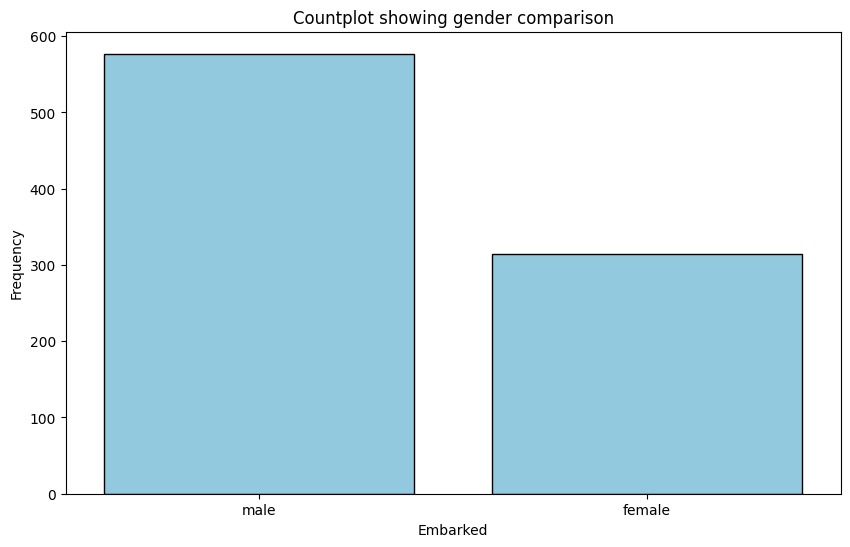

In [ ]:
#Plotting a bar graph to show which station was used the most
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Sex', color='skyblue', edgecolor='black')
plt.title(f'Countplot showing gender comparison')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.show()

## **Correlation**

In [ ]:
df = titanic.copy()

/tmp/ipykernel_30/2509368832.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked'] = df['Embarked'].replace({'S':1, 'C':0, 'Q':2})


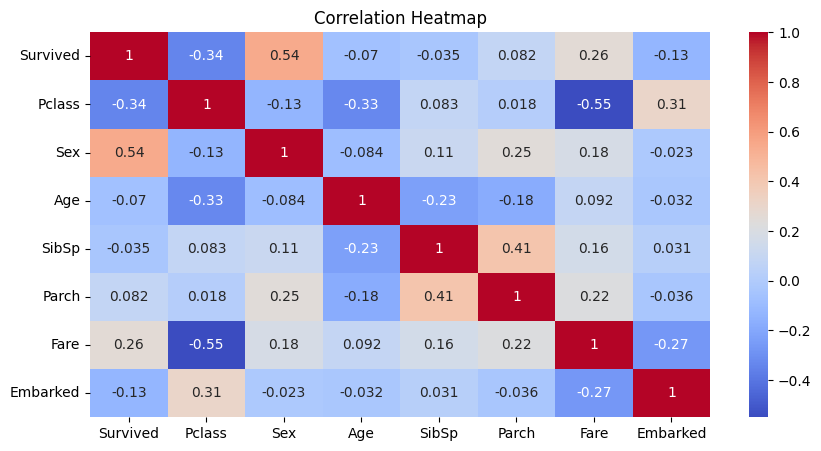

In [ ]:
df['Sex'] = df['Sex'].replace({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].replace({'S':1, 'C':0, 'Q':2})


#Creating a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

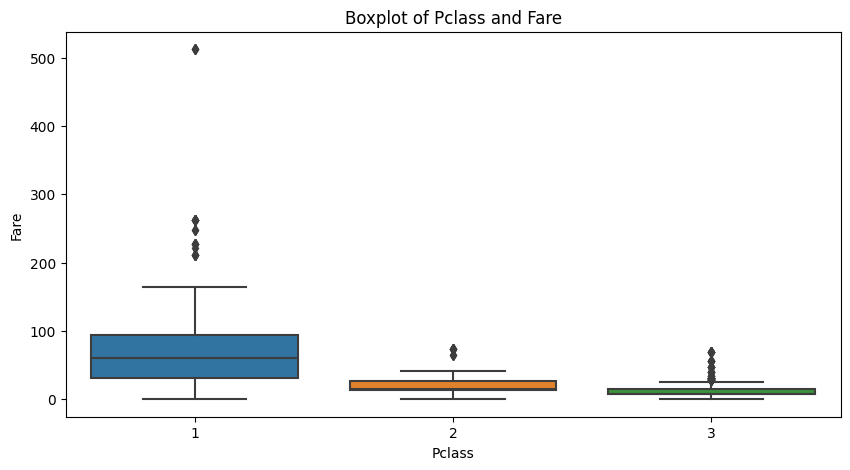

In [ ]:
#Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Boxplot of Pclass and Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

Answers the question why the data is skewed to the left. third-class tickets were significantly cheaper than those for first and second class

<Axes: xlabel='Age', ylabel='Fare'>

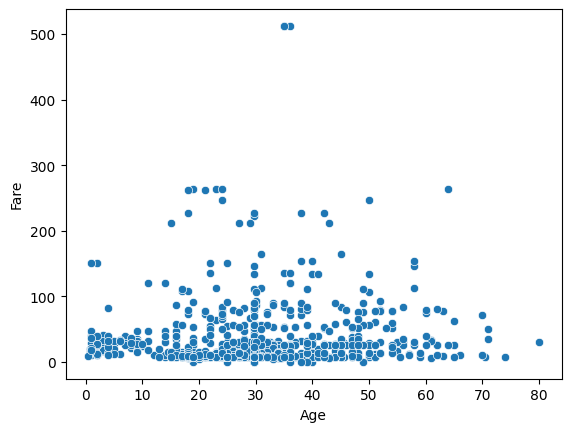

In [ ]:
#Scatterplot
#Show correlation between sex and survived
sns.scatterplot(y='Fare', x='Age', data=titanic)


/tmp/ipykernel_30/3664774133.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex', ci=None)


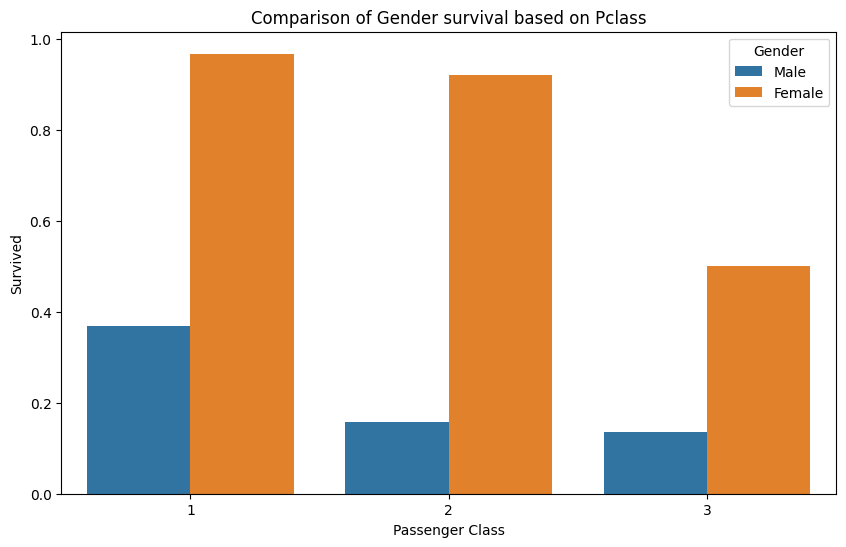

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex', ci=None)

# Customize the plot
plt.title("Comparison of Gender survival based on Pclass")
plt.xlabel("Passenger Class")
plt.ylabel("Survived")
plt.legend(title="Gender", labels=["Male", "Female"])

plt.show()

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [ ]:
titanic_dummies = pd.get_dummies(titanic, columns=['Embarked', 'Sex'], drop_first=True)
titanic_dummies = titanic_dummies.fillna(0)  # Fill any NaN values with 0 before conversion
titanic_dummies = titanic_dummies.astype(int, errors='ignore')  # Convert only compatible columns to int


In [ ]:
titanic.isnull().sum()
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [ ]:
#titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True).astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X = titanic.drop(columns = ['Survived', 'Embarked', 'Sex'])
y = titanic['Survived']

In [ ]:



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare
331,1,45.5,0,0,113043,28.5000
733,2,23.0,0,0,28425,13.0000
382,3,32.0,0,0,STON/O 2. 3101293,7.9250
704,3,26.0,1,0,350025,7.8542
813,3,6.0,4,2,347082,31.2750


In [ ]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

## **Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#Using logistic regression
logistic = LogisticRegression()
# Using neg_log_loss as the scoring metric, which is equivalent to maximizing log-likelihood
neg_log_loss_scores = cross_val_score(logistic, X_train, y_train, cv=10, scoring='neg_log_loss')
mean_log_likelihood = -neg_log_loss_scores.mean()  # Convert negative log-loss to positive for interpretability

print("Mean Log-Likelihood (Log-Loss):", mean_log_likelihood)